In [1]:
import pandas as pd
import numpy as np

import sys
sys.path.append('../../pycore/')
from simulate import RBA_result
from utils import extract_details_from_rxnid

import matplotlib.pyplot as plt
import matplotlib.patches as mp
import seaborn as sns
import matplotlib.lines as mlines
%matplotlib inline

#### Simulation

In [3]:
# Mu = 0
res = RBA_result(biom_id=None)
res.load_from_json('../output/batch/results/mu_0/RBA_result.json')
glc0 = -res.metabolic_flux['EX_glc__D_e']

In [4]:
reslist = []

# Batch
flist = ['vglc_0_5', 'vglc_1_0',
         'vglc_2_0', 'vglc_3_0', 'vglc_4_0', 'vglc_5_0', 'vglc_5_5',
         'vglc_5_6', 'vglc_5_7', 'vglc_6_0', 'vglc_7_0', 'vglc_8_0',
         'vglc_9_0', 'vglc_10_0', 'vglc_11_0', 'vglc_12_0', 'vglc_13_0',
         'vglc_14_0', 'vglc_15_0', 'vglc_16_0', 'vglc_17_0']
for fdir in flist:
    res = RBA_result(biom_id=None)
    res.load_from_json('../output/batch/results_capacitycorrected/' + fdir + '/RBA_result.json')
    reslist.append(res)
    
glcs = [glc0] + [-res.metabolic_flux['EX_glc__D_e'] for res in reslist]
etohs = []
for res in reslist:
    if 'EX_etoh_e' in res.metabolic_flux.keys():
        etohs.append(res.metabolic_flux['EX_etoh_e'])
    else:
        etohs.append(0)
grs = [0] + [res.growth_rate for res in reslist]
rcap = [0] + [res.ribo_capacity_usage for res in reslist]
pcap = [0] + [res.proteome_capacity_usage for res in reslist]

#### Plot

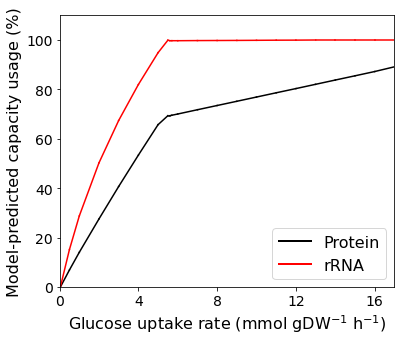

In [5]:
fig,ax = plt.subplots(figsize=(6,5))

# Plot model-predicted protein capacity usage
N = len(glcs)
for i in range(0,N-1):
    p1 = [glcs[i], glcs[i+1]]; p2 = [pcap[i], pcap[i+1]]
    line = mlines.Line2D(p1, p2, color='k', linestyle='-')
    ax.add_line(line);

# Plot model-predicted rRNA capacity usage
N = len(glcs)
for i in range(0,N-1):
    p1 = [glcs[i], glcs[i+1]]; p2 = [rcap[i], rcap[i+1]]
    line = mlines.Line2D(p1, p2, color='r', linestyle='-')
    ax.add_line(line);

ax.set_xlim(0,16);
ax.set_ylim(0,1.1);

xticks = [0,4,8,12,16]
ax.set_xticks(xticks);
ax.set_xticklabels(xticks, fontsize=14);
ax.set_xlim(0,17)

yticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
yticklabels = [0, 20, 40, 60, 80, 100]
ax.set_yticks(yticks);
ax.set_yticklabels(yticklabels, fontsize=14);

ax.set_xlabel('Glucose uptake rate (mmol gDW$^{-1}$ h$^{-1}$)', fontsize=16);
ax.set_ylabel('Model-predicted capacity usage (%)', fontsize=16);

colors = ['k', 'r']
handles = [mlines.Line2D([], [], color=c, lw=2, ls='-') for c in colors]
legend_labels = ['Protein', 'rRNA']
ax.legend(handles, legend_labels, ncol=1, loc='lower right', fontsize=16);

plt.savefig('../figures/capacity_clim.png', transparent=True, bbox_inches='tight')